<a href="https://colab.research.google.com/github/rhearjethvani/MITFutureMakers/blob/main/mnistClassification/mnistClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dropout, Dense
from keras.optimizers import Adam, SGD

from tensorflow.keras.datasets import mnist
import tensorflow as tf

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [3]:
print("X_train", X_train.shape)
print("X_train", X_test.shape)

X_train (60000, 28, 28)
X_train (10000, 28, 28)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Counts')

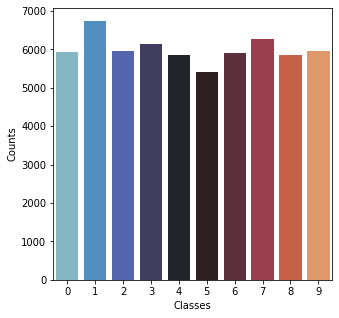

In [4]:
plt.figure(figsize=(5,5))
g = sns.countplot(y_train, palette="icefire")
plt.xlabel("Classes")
plt.ylabel("Counts")

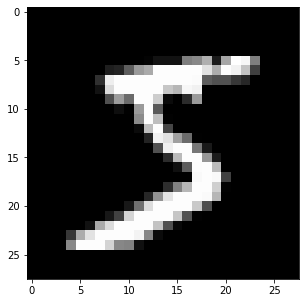

In [5]:
img = X_train[0]
plt.figure(figsize=(5,5))
plt.imshow(img, cmap="gray")

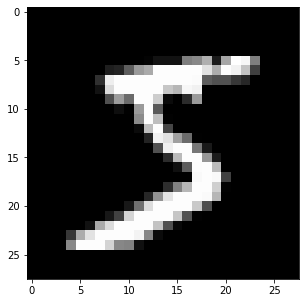

In [6]:
X_train = X_train/225.0
X_test = X_test/225.0

img2 = X_train[0]
plt.figure(figsize=(5,5))
plt.imshow(img, cmap="gray")

In [7]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

In [8]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [9]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [10]:
model = Sequential()
model.add(Conv2D(filters=20, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=10, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(units=10, activation='softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 20)        200       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 20)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 10)        1810      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 10)          0         
_________________________________________________________________
flatten (Flatten)            (None, 250)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                16064     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0

In [16]:
optimer = Adam(learning_rate=0.001)
# optimer = SGD(learning_rate=0.001, momentum=0.99)

In [13]:
model.compile(optimizer=optimer, loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
BATCH_SIZE = 32
EPOCHS = 20

In [15]:
history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(X_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 52s 19ms/step - loss: 0.5317 - accuracy: 0.8334 - val_loss: 0.0766 - val_accuracy: 0.9753
Epoch 2/20
1875/1875 [==============================] - 35s 19ms/step - loss: 0.1064 - accuracy: 0.9685 - val_loss: 0.0633 - val_accuracy: 0.9784
Epoch 3/20
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0796 - accuracy: 0.9754 - val_loss: 0.0480 - val_accuracy: 0.9829
Epoch 4/20
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0616 - accuracy: 0.9805 - val_loss: 0.0423 - val_accuracy: 0.9856
Epoch 5/20
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0545 - accuracy: 0.9836 - val_loss: 0.0424 - val_accuracy: 0.9852
Epoch 6/20
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0483 - accuracy: 0.9854 - val_loss: 0.0394 - val_accuracy: 0.9856
Epoch 7/20
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0392 - accuracy: 0.9873 - val_loss: 0.0336 -

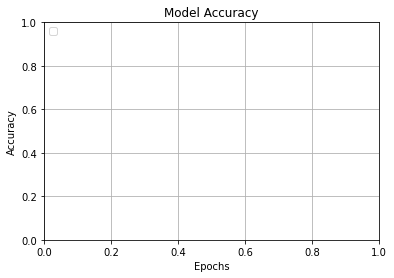

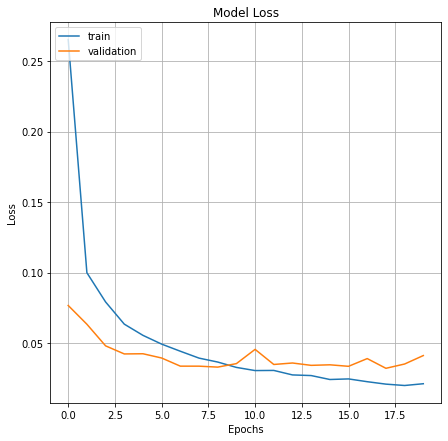

In [17]:
plt.title('Model Accuracy')
plt.grid()
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

fig = plt.figure(figsize=(7, 7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.grid()
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Text(69.0, 0.5, 'Ground Truth')

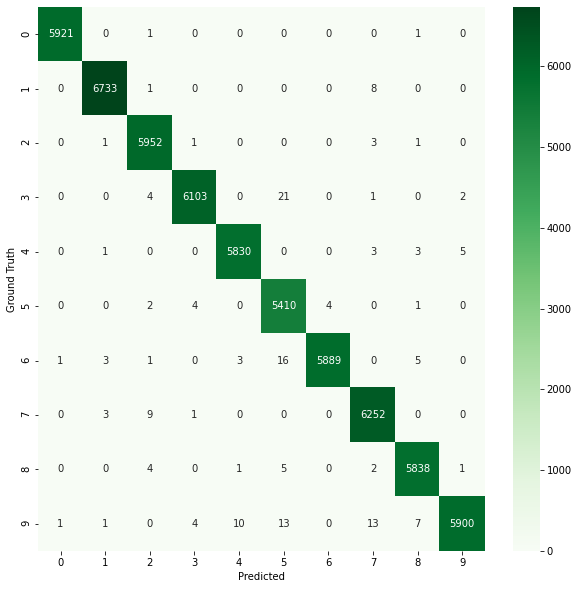

In [18]:
y_pred_train = model.predict(X_train)
y_pred_train = np.argmax(y_pred_train, axis=1)

y_true = np.argmax(y_train, axis=1)
cm = confusion_matrix(y_true=y_true, y_pred=y_pred_train)

fig = plt.figure(figsize=(10,10))
sns.heatmap(cm, cmap='Greens', annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Ground Truth")

In [19]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0411 - accuracy: 0.9888


[0.041104596108198166, 0.9887999892234802]

In [20]:
y_pred_test = model.predict(X_test)
y_pred_test = np.argmax(y_pred_test, axis=1)

y_true_test = np.argmax(y_test, axis=1)